# English Premier League (EPL) Pythagorean Predictor

## Assignment Overview
In week 1 we have looked at the relationship between team win percentage and Pythagorean expectation in four different professional team sport leagues. We concluded the week by comparing the predictive value of Pythagorean expectation and win percentage from one half of a season to the second half of the season win percentage. We did this using Major League Baseball data. The assignment is to repeat this exercise using data for the English Premier League (EPL). For this you are provided with an Excel datafile (EPL2018-18.xlsx) containing all match results for the 2017/18 season (380 games). You will need to load the datafile and then adapt the code we used for Major League Baseball to the case of the EPL.

**Beware:** even though your code might get you to the correct answer at a given point, it is sometimes possible that the way you write it might interfere with completing a further step. So even if you get the answer right, you should look at the code we supply to check if you are going the same way. In practice, there are often many ways to get to answer in Python, and we do not insist that you follow our approach exactly – but simply warn you to be aware that differences could turn out to be problematic later.  

As much as possible, copy and paste lines of code from Notebook 5: “Pythagorean expectation as predictor in MLB”, and then adapt the text to this context.

These are the steps you need to take to complete the assignment:

1. Load the datafile (this contains 6 variables: the date, home team, away team, goals scored (FTHG), goals against (FTAG) andthe result (H- home win, D- draw, A – away win).
2. Create a value for a home wins (win= 1, draw=0.5, loss= 0) and away wins and a count variable for each game (=1).
3. Create a file for games played in 2017 (before date 20180000) and another one for games played in 2018 (after date 20180000). For the 2017 games, **use .groupby to create a dataframe aggregating by home team** the variables for count, home wins, goals for and goals against.  Then, **use .groupby to create a separate dataframe aggregating by away team** the variables for count, away wins, goals for and goals against. Rename the variables to denote whether they are aggregates for home team or away team.
4. Then merge the home and away dataframes.
5. Sum the values of home and away wins, games, goals for and goals against, then create the values for win percentage (wpc) and the Pythagorean expectation (pyth). 
6. Now repeat steps 4-6 for the 2018 games. Be sure to give different names for wpc and pyth in 2017 and 2018.
7. Now merge 2017 and 2018 summary files.
8. Now generate a correlation matrix for the wpc and pyth variables for 2017 and 2018

## Step 1

In [3]:
# Load the packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [26]:
# Load the data. 
# EPL results for the 2017/18 season

EPL = pd.read_excel('Assignment Data/EPL2017-18.xlsx')
EPL.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20170811,Arsenal,Leicester,4,3,H
1,20170812,Brighton,Man City,0,2,A
2,20170812,Chelsea,Burnley,2,3,A
3,20170812,Crystal Palace,Huddersfield,0,3,A
4,20170812,Everton,Stoke,1,0,H


## Step 2

In [33]:
hwins = {'H': 1, 'A': 0, 'D': 0.5}
awins = {'H': 0, 'A': 1, 'D': 0.5}

EPL['HWins'] = EPL.apply(lambda row: hwins[row['FTR']], axis=1)
EPL['AWins'] = EPL.apply(lambda row: awins[row['FTR']], axis=1)
EPL['count'] = 1
EPL['Date'] = pd.to_datetime(EPL['Date'], format='%Y%m%d')
EPL

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HWins,AWins,count
0,2017-08-11,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,2017-08-12,Brighton,Man City,0,2,A,0.0,1.0,1
2,2017-08-12,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,2017-08-12,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,2017-08-12,Everton,Stoke,1,0,H,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
375,2018-05-13,Newcastle,Chelsea,3,0,H,1.0,0.0,1
376,2018-05-13,Southampton,Man City,0,1,A,0.0,1.0,1
377,2018-05-13,Swansea,Stoke,1,2,A,0.0,1.0,1
378,2018-05-13,Tottenham,Leicester,5,4,H,1.0,0.0,1


## Step 3

In [72]:
# Break into seasons
EPL17 = EPL[EPL['Date']<'2018-01-01']
EPL18 = EPL[EPL['Date']>'2018-01-01']

# Groupby home and away teams for count, wins, goals for and goals against
EPL17hm = (EPL17.groupby('HomeTeam').sum().loc[:,['count','HWins','FTHG','FTAG']].reset_index()
                .rename({'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'},axis=1))
EPL17aw = (EPL17.groupby('AwayTeam').sum().loc[:,['count','AWins','FTAG','FTHG']].reset_index()
               .rename({'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'},axis=1))


In [42]:
EPL17aw.head()

,team,Pa,AWins,FTAGa,FTHGa
0,Arsenal,11,5.0,13,16
1,Bournemouth,10,3.0,6,15
2,Brighton,11,3.0,5,13
3,Burnley,11,6.5,11,11
4,Chelsea,10,7.0,18,7


## Step 4 (home team)

In [46]:
EPL17_sum = EPL17hm.merge(EPL17aw, on='team')
EPL17_sum.head()

,team,Ph,HWins,FTHGh,FTAGh,Pa,AWins,FTAGa,FTHGa
0,Arsenal,10,8.5,25,10,11,5.0,13,16
1,Bournemouth,11,4.5,14,17,10,3.0,6,15
2,Brighton,10,5.5,10,12,11,3.0,5,13
3,Burnley,10,6.0,7,6,11,6.5,11,11
4,Chelsea,11,8.5,21,7,10,7.0,18,7


## Step 5 (home team)

In [47]:
# Sum the values of home and away wins, games, goals for and goals against, then create the values for win percentage (wpc) and the Pythagorean expectation (pyth).
def get_sums(df, wpc_name, pyth_name):
    df['W'] = df['HWins'] + df['AWins']
    df['G'] = df['Ph'] + df['Pa']
    df['Gf'] = df['FTHGh'] + df['FTAGa']
    df['Ga'] = df['FTAGh'] + df['FTHGa']
    df[wpc_name] = df['W'] / df['G']
    df[pyth_name] = df['Gf']**2/(df['Gf']**2 + df['Ga']**2)
    return df

EPL17_sum = get_sums(EPL17_sum, 'wpc17', 'pyth17')

## Step 6 (home team)

In [48]:
# Groupby home and away teams for count, wins, goals for and goals against
EPL18hm = (EPL18.groupby('HomeTeam').sum().loc[:,['count','HWins','FTHG','FTAG']].reset_index()
                .rename({'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'},axis=1))
EPL18aw = (EPL18.groupby('AwayTeam').sum().loc[:,['count','AWins','FTAG','FTHG']].reset_index()
               .rename({'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'},axis=1))

# Merge and create summary dataframe
EPL18_sum = get_sums(EPL18hm.merge(EPL18aw, on='team'), 'wpc18', 'pyth18')

## Optional steps, not required for Assessment 
### (Uncomment to run)

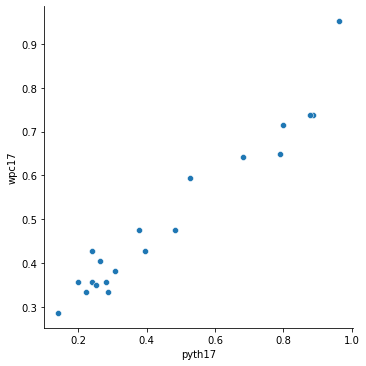

In [52]:
# Plot the data
EPL17=EPL17_sum
EPL18=EPL18_sum
sns.relplot(x="pyth17", y="wpc17", data =EPL17)

In [51]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc17 ~ pyth17', data=EPL17).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc17   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           2.81e-12
Time:                        16:04:19   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
pyth17         0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 7 (=Step 4 (away team))

## Step 7 (=Step 5 (away team))

## Step 7 (=Step 6 (away team))

## Optional steps, not required for Assessment
### (Uncomment to run)

In [ ]:
# Plot the data

#sns.relplot(x="pyth18", y="wpc18", data =EPL2018)

In [ ]:
# Run the regression

#pyth_lm = smf.ols(formula = 'wpc18 ~ pyth18', data=EPL2018).fit()
#pyth_lm.summary()

## Step 8

In [74]:
EPL18.sum()

HomeTeam    Man CitySouthamptonSwanseaWest HamArsenalTotte...
AwayTeam    WatfordCrystal PalaceTottenhamWest BromChelsea...
FTHG                                                      268
FTAG                                                      182
FTR         HAAHDDDHADHDHHHHHAADHHHDDHAHDAHHDDDHHHHDDHADDH...
HWins                                                   101.0
AWins                                                    65.0
count                                                     166
dtype: object

## Step 9

1. 380, 190, 171
2. Man City
3. Stoke
4. Man City
5. Leicester
6. West Ham
7. Arsenal
8. 0.968
9. 0.796, 0.757
10. 0.796

## Optional steps, not required for Assessment
### (Uncomment to run)

In [ ]:
#sns.relplot(x="pyth17", y="wpc18", data =Half2predictor)

In [ ]:
#sns.relplot(x="wpc17", y="wpc18", data =Half2predictor)

Now you have completed the assignment, are these results consistent with those we found for Major League Baseball?